<a href="https://colab.research.google.com/github/sofia-rajan/ML-Training/blob/main/ML_Training_Nov8_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Business Understanding
Goal: Predict house prices based on various features like size, location, and condition.

Value: Helps real estate agents, buyers, and banks make informed decisions.



# Step 2: Data Collection

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:

# Load the Ames Housing dataset
url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
df = pd.read_csv(url)
print("Data Loaded Successfully!")
df.head()

Data Loaded Successfully!


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


from matplotlib import pyplot as plt
_df_0['longitude'].plot(kind='hist', bins=20, title='longitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['latitude'].plot(kind='hist', bins=20, title='latitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['housing_median_age'].plot(kind='hist', bins=20, title='housing_median_age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['total_rooms'].plot(kind='hist', bins=20, title='total_rooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='longitude', y='latitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='latitude', y='housing_median_age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='housing_median_age', y='total_rooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='total_rooms', y='total_bedrooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['longitude'].plot(kind='line', figsize=(8, 4), title='longitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['latitude'].plot(kind='line', figsize=(8, 4), title='latitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['housing_median_age'].plot(kind='line', figsize=(8, 4), title='housing_median_age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['total_rooms'].plot(kind='line', figsize=(8, 4), title='total_rooms')
plt.gca().spines[['top', 'right']].set_visible(False)

Interpretation: The first few rows of the dataset are displayed to get an initial understanding of the data structure.

# Step 3: Data Cleaning

In [ ]:
# Check for missing values and handle them
df.fillna(df.median(), inplace=True)
print("Missing values handled!")

TypeError: Cannot convert [['NEAR BAY' 'NEAR BAY' 'NEAR BAY' ... 'INLAND' 'INLAND' 'INLAND']] to numeric

In [ ]:
# Get numeric columns
numeric_df = df.select_dtypes(include=np.number)

# Fill missing values in numeric columns with their medians
numeric_df.fillna(numeric_df.median(), inplace=True)

# Update the original DataFrame with the filled numeric columns
df[numeric_df.columns] = numeric_df

print("Missing values handled!")

Missing values handled!


Interpretation: Missing values have been filled with the median value of each column to maintain data integrity.


In [ ]:
# Remove duplicates (if any)
df.drop_duplicates(inplace=True)
print("Duplicates removed!")

Duplicates removed!


Interpretation: Any duplicate rows in the dataset have been removed to avoid redundancy.


# Step 4: Data Preprocessing

In [ ]:
# Encode categorical features using One-Hot Encoding
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)
print("Categorical features encoded!")

Categorical features encoded!


Interpretation: The categorical feature 'ocean_proximity' has been converted into numerical form using one-hot encoding.


In [ ]:
# Normalize numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['median_income', 'housing_median_age']] = scaler.fit_transform(df[['median_income', 'housing_median_age']])
print("Numerical features normalized!")

Numerical features normalized!


Interpretation: Numerical features like 'median_income' and 'housing_median_age' have been scaled to a standard range for better model performance.


# Step 5: Exploratory Data Analysis (EDA)


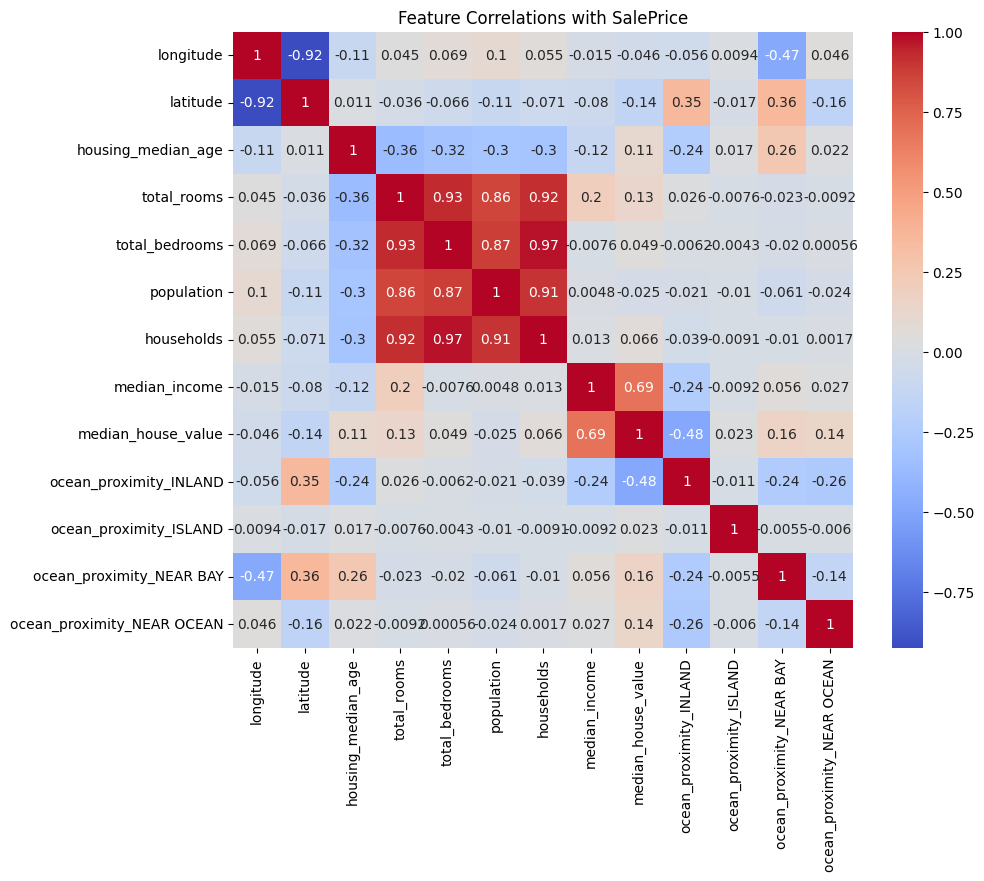

In [ ]:
# Correlation heatmap to identify important features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlations with SalePrice')
plt.show()

Interpretation: The heatmap shows the correlation between different features and the target variable 'median_house_value'. Strong correlations indicate features that are likely to be important predictors.


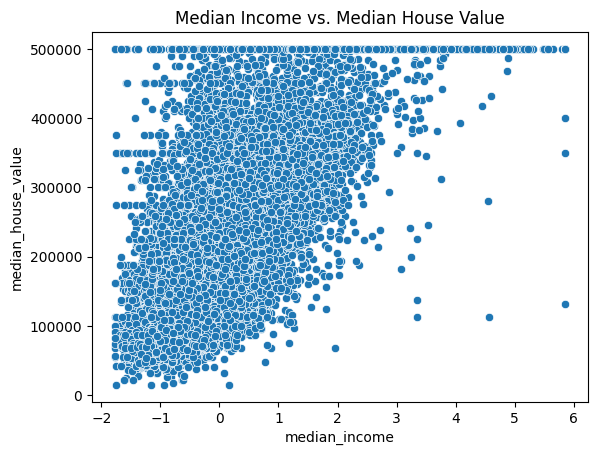

In [ ]:
# Scatter plot for median income vs median house value
sns.scatterplot(x='median_income', y='median_house_value', data=df)
plt.title('Median Income vs. Median House Value')
plt.show()

Interpretation: The scatter plot shows a positive relationship between median income and house value, indicating that higher incomes are associated with higher house prices.


# Step 6: Model Building


In [ ]:
# Define features (X) and target (y)
X = df.drop(columns=['median_house_value'])
y = df['median_house_value']

In [ ]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
print("Model Trained Successfully!")

Model Trained Successfully!


Interpretation: The Linear Regression model has been trained using the training data, learning the relationships between features and the target variable.


# Step 7: Model Evaluation


In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")

Mean Squared Error: 4908476721.156624
R-Squared: 0.6254240620553599


Interpretation:

1. Mean Squared Error (MSE): This value indicates the average squared difference between predicted and actual values. A lower MSE means better accuracy.

2. R-Squared: This value represents the proportion of the variance in the target variable that is predictable from the features. An R-squared closer to 1 indicates a better fit.


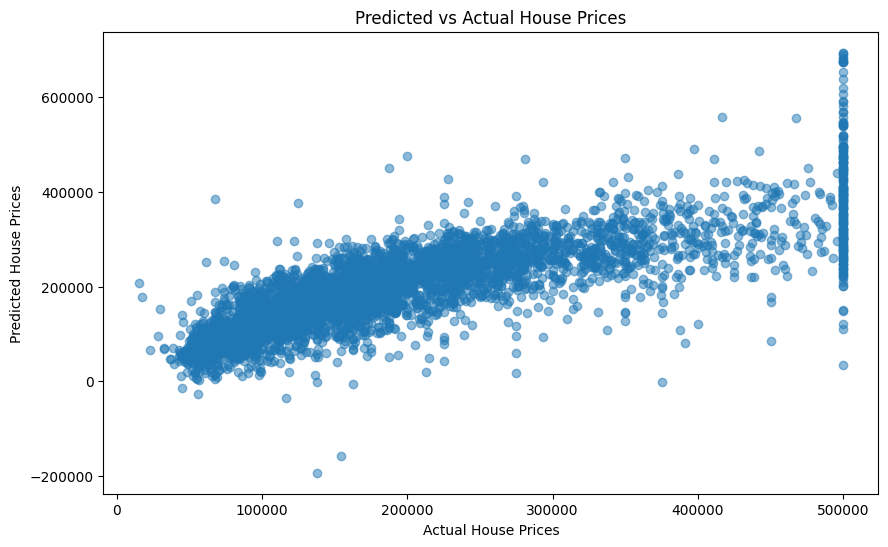

In [ ]:
# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Predicted vs Actual House Prices')
plt.show()

Interpretation: The scatter plot shows how well the predicted values align with the actual values. Ideally, the points should lie close to a 45-degree line, indicating accurate predictions.
